# <font color="red"> Using KNN classifier


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load data


In [19]:

data = np.load('Data.npy')
labels = np.load('Labels.npy')


In [26]:
data

array([[[135., 133., 131., ...,  24.,  21.,  19.],
        [132., 130., 129., ...,  32.,  28.,  24.],
        [134., 128., 125., ...,  43.,  37.,  32.],
        ...,
        [  2.,   2.,   3., ..., 161., 161., 157.],
        [  1.,   2.,   3., ..., 162., 164., 159.],
        [  3.,   2.,   3., ..., 164., 166., 161.]],

       [[185.,  40.,   0., ...,   0.,  24., 131.],
        [ 75.,  14.,   0., ...,   0.,   8.,  42.],
        [ 11.,   2.,   0., ...,   1.,   3.,  12.],
        ...,
        [ 78.,  62.,  68., ...,   3.,  13.,  27.],
        [104.,  74.,  75., ...,   1.,  23.,  83.],
        [156.,  90.,  78., ...,   1.,  45., 167.]],

       [[ 24.,  24.,  24., ...,  32.,  33.,  33.],
        [ 27.,  26.,  26., ...,  35.,  36.,  36.],
        [ 27.,  25.,  25., ...,  35.,  36.,  37.],
        ...,
        [ 29.,  27.,  26., ...,  32.,  31.,  32.],
        [ 28.,  26.,  25., ...,  31.,  30.,  31.],
        [ 25.,  24.,  23., ...,  28.,  27.,  28.]],

       ...,

       [[  0.,   0.,   0

In [27]:
labels

array(['Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

# Split data into training and testing sets


In [20]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Flatten images


In [24]:

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create a KNN classifier


In [21]:

knn = KNeighborsClassifier()
pipeline = Pipeline([('scaler', StandardScaler()),('knn', knn)])


# Perform grid search


In [33]:

parameters = {
    'knn__n_neighbors': [1, 3, 5, 7, 9],  # K values to try
    'knn__weights': ['uniform', 'distance'],  # Weighting options
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics to try
}

data = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
data.fit(X_train_flat, y_train) 

print("Best parameters:", data.best_params_)

c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.7    0.7    0.675  0.6875 0.725  0.7375 0.7375 0.7375 0.75   0.75
    nan 0.725     nan 0.7375    nan 0.7625    nan 0.7625    nan 0.725
    nan 0.625     nan 0.6125    nan 0.65      nan 0.6125    nan 0.625 ]
  warnings.warn(


Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


# Predict on the test set


In [34]:

y_pred = data.predict(X_test_flat)  

# Calculate accuracy


In [35]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


# Plot confusion matrix


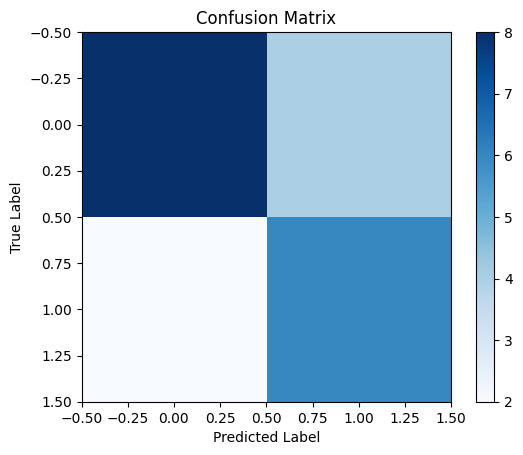

In [36]:

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
